In [1]:
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
import google.generativeai as genai

c:\Users\Dell\anaconda3\envs\RAG_USING_GEMINI_PRO\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
import os
genai.configure(api_key=os.environ.get("GOOGLE_API_KEY"))

In [4]:
model = genai.GenerativeModel(model_name = "gemini-pro")
model

genai.GenerativeModel(
    model_name='models/gemini-pro',
    generation_config={},
    safety_settings={},
    tools=None,
)

In [5]:
prompt = [
    "What is Mixture of Experts?",
]

response = model.generate_content(prompt)

In [6]:
print(response.text)

**Mixture of Experts (MoE)** is a machine learning technique that combines multiple expert models to improve prediction performance on complex tasks.

**Concept:**

MoE assumes that a complex task can be decomposed into multiple sub-tasks, each of which can be better handled by a specialized expert model. The MoE network:

1. **Routing Network:** Selects the appropriate expert model for a given input data point.
2. **Expert Models:** Individual models trained to handle specific sub-tasks.
3. **Gating Network:** Combines the outputs of the expert models into a final prediction.

**How it Works:**

1. The routing network assigns a weight (or gate) to each expert model based on the input data.
2. Each expert model independently makes predictions on the input data.
3. The outputs of the expert models are weighted by the gates assigned by the routing network.
4. The weighted predictions are summed to produce the final output of the MoE network.

**Advantages of MoE:**

* **Improved Accuracy

In [7]:
from IPython.display import display
from IPython.display import Markdown
import textwrap


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [8]:
to_markdown(response.text)

> **Mixture of Experts (MoE)** is a machine learning technique that combines multiple expert models to improve prediction performance on complex tasks.
> 
> **Concept:**
> 
> MoE assumes that a complex task can be decomposed into multiple sub-tasks, each of which can be better handled by a specialized expert model. The MoE network:
> 
> 1. **Routing Network:** Selects the appropriate expert model for a given input data point.
> 2. **Expert Models:** Individual models trained to handle specific sub-tasks.
> 3. **Gating Network:** Combines the outputs of the expert models into a final prediction.
> 
> **How it Works:**
> 
> 1. The routing network assigns a weight (or gate) to each expert model based on the input data.
> 2. Each expert model independently makes predictions on the input data.
> 3. The outputs of the expert models are weighted by the gates assigned by the routing network.
> 4. The weighted predictions are summed to produce the final output of the MoE network.
> 
> **Advantages of MoE:**
> 
> * **Improved Accuracy:** By combining multiple specialized models, MoE can capture different aspects of the task and improve overall prediction performance.
> * **Scalability:** MoE allows for the addition of new expert models as needed, making it scalable to handle large datasets.
> * **Resource Efficiency:** By selectively using only relevant expert models, MoE can save computational resources compared to training a single large model.
> 
> **Applications:**
> 
> MoE has been successfully applied to a wide range of tasks, including:
> 
> * Image classification
> * Natural language processing
> * Machine translation
> * Recommender systems
> 
> **Recent Advancements:**
> 
> * **Transformer-based MoE:** Incorporates attention mechanisms from Transformer models into the routing and expert networks, improving performance on complex tasks.
> * **Hierarchical MoE:** Constructs multiple levels of MoE networks, where each level focuses on increasingly specialized sub-tasks.
> * **Parameterized MoE:** Allows for dynamically adjusting the parameters of the routing and gating networks, enhancing model adaptability.

Use LangChain to Access Gemini API

In [9]:
from langchain_google_genai import ChatGoogleGenerativeAI


In [10]:
llm = ChatGoogleGenerativeAI(model="gemini-pro")

In [11]:
result = llm.invoke("What is Mixture of Experts?")


In [12]:
to_markdown(result.content)

> **Mixture of Experts (MoE)**
> 
> **Definition:**
> 
> MoE is an ensemble learning technique that combines multiple models, or "experts," to improve predictive performance. It assumes that different parts of the input data are best handled by different experts.
> 
> **How it Works:**
> 
> 1. **Input Data:** The input data is divided into multiple partitions, or "gates."
> 2. **Expert Models:** A set of expert models is created, each trained on a different partition of the data.
> 3. **Gating Network:** A gating network is used to determine which expert model should handle each data point. The gating network outputs a probability distribution over the experts.
> 4. **Weighted Combination:** The outputs of the expert models are weighted by the gating network's probabilities and combined to produce the final prediction.
> 
> **Benefits:**
> 
> * **Improved Predictive Performance:** By combining multiple experts, MoE can capture different patterns and trends in the data, leading to better predictive accuracy.
> * **Flexibility:** MoE allows for the use of different types of expert models, such as neural networks, decision trees, or logistic regression.
> * **Scalability:** MoE can be parallelized across multiple processing units, making it suitable for large datasets.
> 
> **Applications:**
> 
> MoE is used in a variety of applications, including:
> 
> * Image classification
> * Natural language processing
> * Speech recognition
> * Recommendation systems
> 
> **Advantages over Single Models:**
> 
> * **Overcomes the bias of individual models:** Different experts can handle different types of data points, reducing the bias of any single model.
> * **Improves generalization:** MoE can learn patterns from different partitions of the data, leading to better generalization to unseen data.
> * **Handles complex data:** MoE can be used to model complex data distributions that cannot be captured by a single model.

Gemini Pro Vision

In [13]:
# prompt: How to show an image from a given url within markdown
import requests
import io
from PIL import Image

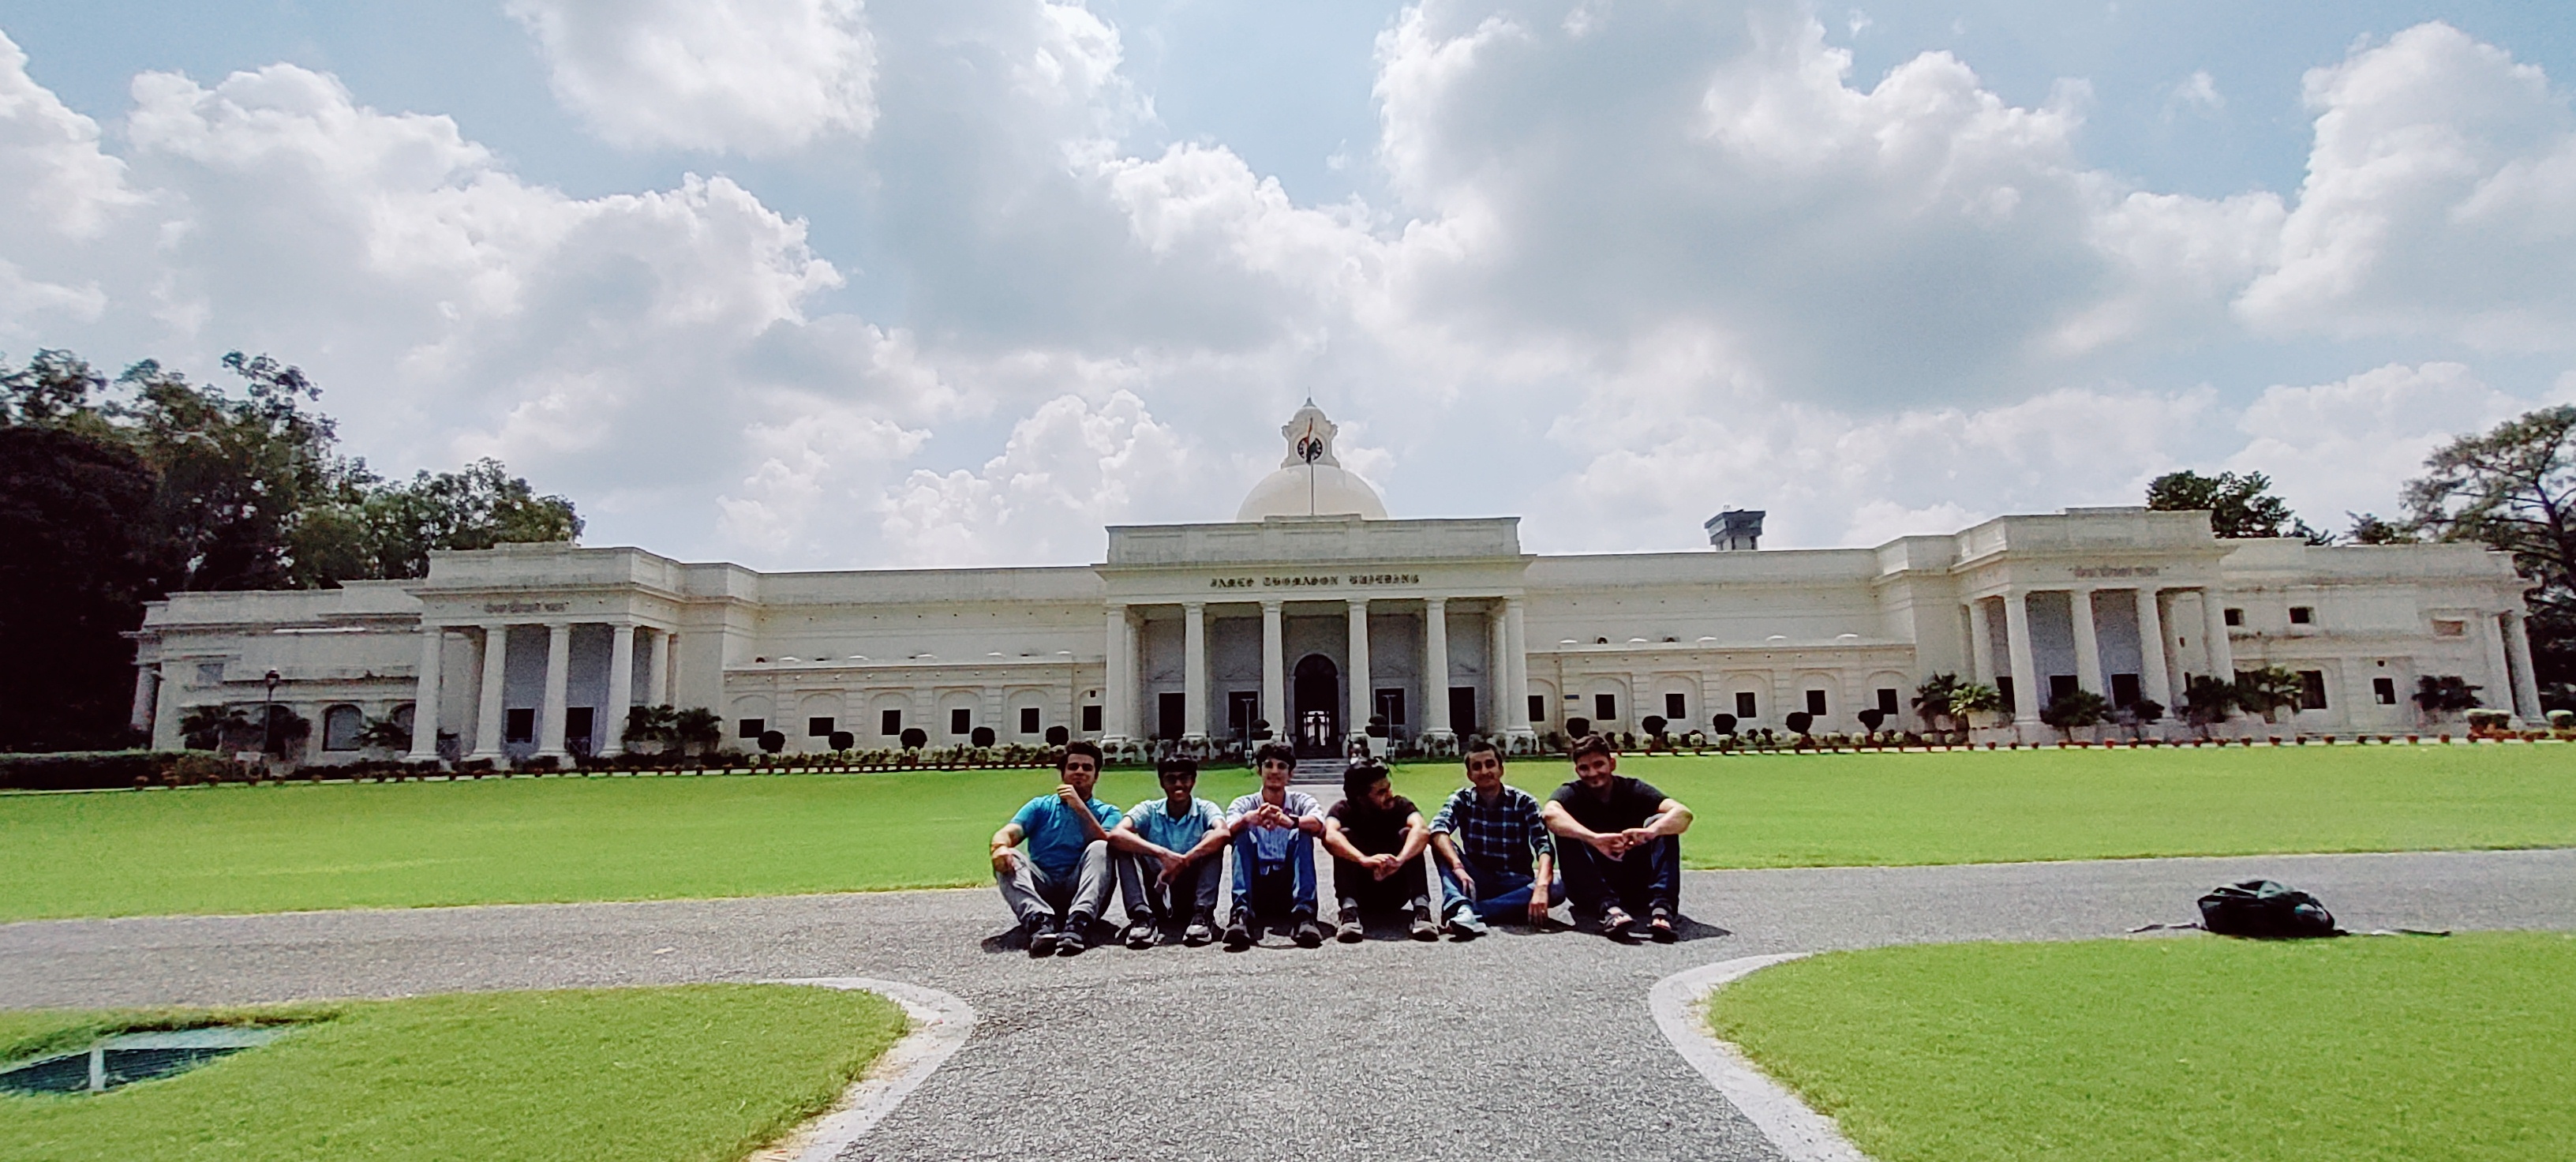

In [14]:
from IPython.display import Image

# Specify the path to your local image file
image_path = "pic.jpg"



# Display the image
Image(filename=image_path)


In [15]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example


In [16]:

message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },
        {"type": "image_url", "image_url": "https://picsum.photos/seed/picsum/200/300"},
    ]
)
llm.invoke([message])

AIMessage(content=' This image shows a snow-covered mountain peak at sunrise or sunset. The sky is a mix of blue and light pink. The mountain is covered in snow and there is a hint of clouds around it.', response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]}, id='run-2e50d97a-ddef-48ef-9245-4f936941060f-0')

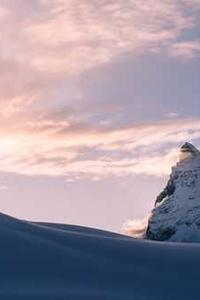

In [25]:
from PIL import Image
import requests
import io
from IPython.display import display

def show_image(url):
    response = requests.get(url)
    image = Image.open(io.BytesIO(response.content))
    display(image)

show_image("https://picsum.photos/seed/picsum/200/300")


In [28]:
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What do you see in this image? Create a short story based on the content",
        },
        {"type": "image_url", "image_url": "https://picsum.photos/seed/picsum/200/300"},
    ]
)

In [29]:
result = llm.invoke([message])

In [30]:
to_markdown(result.content)

>  The mountain stood tall and proud, its peak piercing the sky. It was a beautiful sight, but also a daunting one. I had always dreamed of climbing that mountain, but I knew it would be a challenge.
> 
> I started my journey early in the morning, while the sun was still rising. The air was cold and crisp, and the snow crunched under my boots. I hiked for hours, following a winding trail that led up the mountainside.
> 
> As I climbed, the air became thinner and the snow became deeper. The wind picked up, and it started to snow lightly. I was getting tired, but I kept going. I knew that I was getting closer to my goal.
> 
> Finally, after hours of climbing, I reached the summit of the mountain. I was exhausted, but I was also exhilarated. I had achieved my dream.
> 
> I stood there for a long time, taking in the view. The world seemed so small from up here. I felt like I was on top of the world.
> 
> After a while, I started to make my way back down the mountain. The descent was easier than the ascent, but it was still challenging. I was tired, but I was also happy. I had accomplished something great.
> 
> I learned a lot about myself on that climb. I learned that I am capable of more than I thought I was. I learned that I can push myself to my limits and achieve my dreams.
> 
> I also learned that the journey is just as important as the destination. The climb was hard, but it was also rewarding. I made memories that will last a lifetime.
> 
> I am grateful for the opportunity to have climbed that mountain. It was a life-changing experience.

#Chat with Documents

In [37]:
import urllib
import warnings
from pathlib import Path as p
from pprint import pprint

import pandas as pd
from langchain import PromptTemplate
from langchain.chains.question_answering import load_qa_chain
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.vectorstores import Chroma

warnings.filterwarnings("ignore")
# restart python kernal if issues with langchain import.

#In Context Information Retreival

In [38]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model="gemini-pro",
                             temperature=0.3)

In [39]:
data_folder = p.cwd() / "data"
p(data_folder).mkdir(parents=True, exist_ok=True)

pdf_url = "https://services.google.com/fh/files/misc/practitioners_guide_to_mlops_whitepaper.pdf"
pdf_file = str(p(data_folder, pdf_url.split("/")[-1]))

urllib.request.urlretrieve(pdf_url, pdf_file)

('c:\\Users\\Dell\\#vikram_work\\NLP_LLM\\rag_using_gemini_pro\\data\\practitioners_guide_to_mlops_whitepaper.pdf',
 <http.client.HTTPMessage at 0x230df87e210>)

Extract text from the PDF

In [40]:
pdf_loader = PyPDFLoader(pdf_file)
pages = pdf_loader.load_and_split()
print(pages[3].page_content)

4
Organizations can use the framework to identify gaps in building an integrated ML platform and to focus on the scale 
and automate themes from Google’s AI Adoption Framework. The decision about whether (or to which degree) to 
adopt each of these processes and capabilities in your organization depends on your business context. For exam -
ple, you must determine the business value that the framework creates when compared to the cost of purchasing or 
building capabilities (for example, the cost in engineering hours).
Overview of MLOps lifecycle  
and core capabilities
Despite the growing recognition of AI/ML as a crucial pillar of digital transformation, successful deployments and 
effective operations are a bottleneck for getting value from AI. Only one in two organizations has moved beyond 
pilots and proofs of concept. Moreover, 72% of a cohort of organizations that began AI pilots before 2019 have not 
been able to deploy even a single application in production.1 Algorithmia’s sur

In [41]:
context = "\n".join(str(p.page_content) for p in pages[:30])
print("The total words in the context: ", len(context))

The total words in the context:  55545


Prompt Design - In Context

In [46]:
prompt_template = """Answer the question as precise as possible using the provided context. If the answer is
                    not contained in the context, say "answer not available in context" \n\n
                    Context: \n {context}?\n
                    Question: \n {question} \n
                    Answer:
                  """

prompt = PromptTemplate(
    template=prompt_template, input_variables=["context", "question"]
)

In [47]:
stuff_chain = load_qa_chain(model, chain_type="stuff", prompt=prompt)

In [49]:
question = "What is Experimentation?"


stuff_answer = stuff_chain(
    {"input_documents": pages[7:10], "question": question}, return_only_outputs=True
)

In [52]:
pprint(stuff_answer)

{'output_text': 'Experimentation is the core activity during the ML '
                'development phase where data scientists and ML researchers '
                'prototype model architectures and training routines, create '
                'labeled datasets, and use features and other reusable ML '
                'artifacts that are governed through the data and model '
                'management process.'}


In [53]:
question = "Describe data management and feature management systems."


stuff_answer = stuff_chain(
    {"input_documents": pages[7:10], "question": question}, return_only_outputs=True
)

pprint(stuff_answer)


{'output_text': 'Answer not available in context'}


RAG Pipeline: Embedding + LLM

In [54]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings

In [55]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=10000, chunk_overlap=100)
context = "\n\n".join(str(p.page_content) for p in pages)
texts = text_splitter.split_text(context)

In [56]:
texts

['Practitioners guide to MLOps:  \nA framework for continuous \ndelivery and automation of  \nmachine learning.White paper\nMay 2021\nAuthors:  \nKhalid Salama,  \nJarek Kazmierczak,  \nDonna Schut\n\nTable of Contents\nExecutive summary  3\nOverview of MLOps lifecycle and core capabilities  4\nDeep dive of MLOps processes  15\nPutting it all together  34\nAdditional resources  36Building an ML-enabled system  6\nThe MLOps lifecycle  7\nMLOps: An end-to-end workflow  8\nMLOps capabilities  9\n      Experimentation  11\n      Data processing  11\n      Model training  11\n      Model evaluation  12\n      Model serving  12\n      Online experimentation  13\n      Model monitoring  13\n      ML pipelines  13\n      Model registry  14\n      Dataset and feature repository  14\n      ML metadata and artifact tracking  15\nML development  16\nTraining operationalization  18\nContinuous training  20\nModel deployment  23\nPrediction serving  25\nContinuous monitoring  26\nData and model mana

In [57]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [2]:
pip install chromadb


  Using cached chromadb-0.4.24-py3-none-any.whl.metadata (7.3 kB)
  Using cached build-1.2.1-py3-none-any.whl.metadata (4.3 kB)
  Using cached chroma-hnswlib-0.7.3.tar.gz (31 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached fastapi-0.110.1-py3-none-any.whl.metadata (24 kB)
  Using cached uvicorn-0.29.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached posthog-3.5.0-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached pulsar_client-3.4.0-cp312-cp312-win_amd64.whl.metadata (1.0 kB)
  Using cached onnxruntime-1.17.1-cp312-cp312-win_amd64.whl.metadata (4.4 kB)
  Using cached opentelemetry_api-1.24.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached opentelemetry_exporter_otlp_proto_grpc-1.24.0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress t

In [3]:
vector_index = Chroma.from_texts(texts, embeddings).as_retriever()

NameError: name 'Chroma' is not defined

In [ ]:
question = "Describe data management and feature management systems."
docs = vector_index.get_relevant_documents(question)


In [ ]:
docs

In [ ]:
stuff_answer = stuff_chain(
    {"input_documents": docs, "question": question}, return_only_outputs=True
)

In [ ]:
pprint(stuff_answer)